# Musical Instrument Detection

### Loading dataset from Kaggle


In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gpiosenka_musical_instruments_image_classification_path = kagglehub.dataset_download('gpiosenka/musical-instruments-image-classification')

print('Data source import complete.')
print('Data source path:', gpiosenka_musical_instruments_image_classification_path)


c:\Users\Nouran\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.
Data source path: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1


In [2]:
print(f"The dataset has been downloaded to: {gpiosenka_musical_instruments_image_classification_path}")

# Optionally, you can also check the directory structure
import os
print("Files in the dataset directory:")
print(os.listdir(gpiosenka_musical_instruments_image_classification_path))

The dataset has been downloaded to: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1
Files in the dataset directory:
['6 test samples', 'class_dict.csv', 'EfficientNetB3-instruments-99.33.h5', 'instruments.csv', 'test', 'train', 'valid']


### Imports

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import random
from keras.utils import img_to_array, load_img
from keras.models import Sequential  # Fixed typo: 'Sequentials' → 'Sequential'
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,GlobalAveragePooling2D  # Fixed typo: 'flatten' → 'Flatten'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Fixed typo: 'Earlystopping' → 'EarlyStopping'
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Adjusting Paths and checking that the Directory Exists

In [4]:
# Adjusting paths to the dataset after downloading it from Kaggle
train_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train"
test_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test"
valid_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/valid"

# Verify the paths
import os
print(f"Train Path: {train_path}")
print(f"Test Path: {test_path}")
print(f"Validation Path: {valid_path}")

# Check if directories exist
print("Train directory exists:", os.path.exists(train_path))
print("Test directory exists:", os.path.exists(test_path))
print("Validation directory exists:", os.path.exists(valid_path))


Train Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train
Test Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test
Validation Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/valid
Train directory exists: True
Test directory exists: True
Validation directory exists: True


### Checking the number of Classes & Images

In [5]:
# Check the number of classes in the dataset
class_folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

num_classes = len(class_folders)
# Check the number of images in each class
class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}
print(f"Number of classes: {num_classes}")
print(f"Class counts: {class_counts } ")
# Check the number of images in the training and test directories
train_images = len(os.listdir(train_path))
test_images = len(os.listdir(test_path))
print(f"Number of training images: {train_images}")
print(f"Number of test images: {test_images}")


Number of classes: 30
Class counts: {'acordian': 209, 'alphorn': 134, 'bagpipes': 137, 'banjo': 155, 'bongo drum': 141, 'casaba': 218, 'castanets': 130, 'clarinet': 133, 'clavichord': 207, 'concertina': 152, 'Didgeridoo': 145, 'drums': 184, 'dulcimer': 126, 'flute': 194, 'guiro': 117, 'guitar': 137, 'harmonica': 142, 'harp': 173, 'marakas': 114, 'ocarina': 127, 'piano': 119, 'saxaphone': 127, 'sitar': 216, 'steel drum': 128, 'Tambourine': 275, 'trombone': 163, 'trumpet': 167, 'tuba': 175, 'violin': 143, 'Xylophone': 205} 
Number of training images: 30
Number of test images: 30


Text(0.5, 0, 'Class Names')

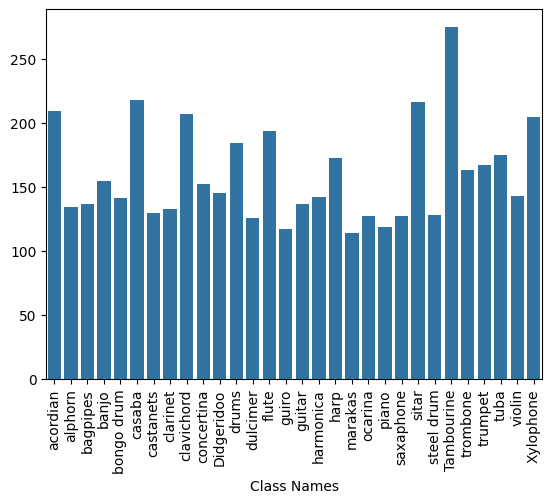

In [6]:
# Plotting the class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class Names')

### Displaying Random Images from Dataset

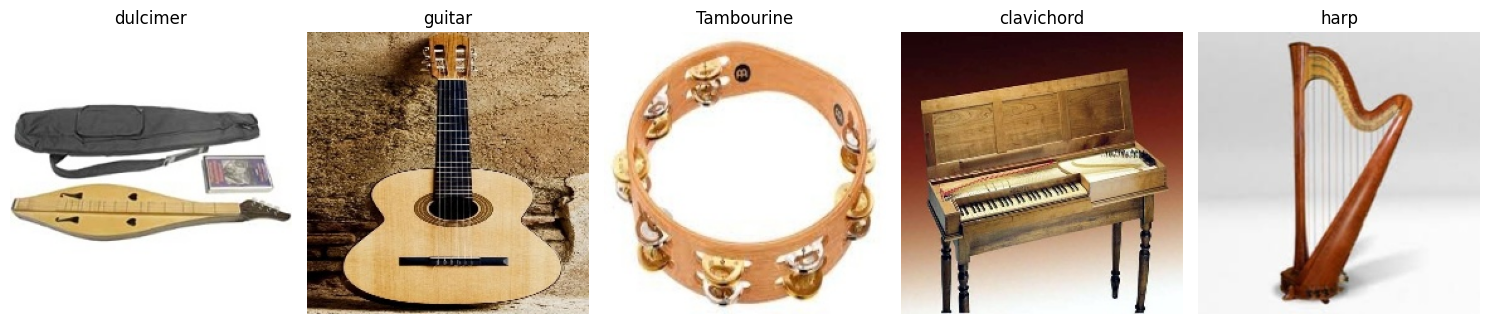

In [7]:
from tensorflow.keras.utils import load_img
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img


# Pick 5 random classes (or all if less than 5)
random_classes = random.sample(class_folders, min(5, len(class_folders)))

# Plot settings
plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(random_classes):
    class_path = os.path.join(train_path, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)
        img = load_img(img_path)

        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

### Loading Dataset Function to Use in the Models
Augmentation is also implemented here and it will be applying while training the datasets using the models.

In [ ]:
def load_data(train_path, valid_path, test_path, img_size=(224, 224), batch_size=64, seed=42, return_class_weights=False):
    # Apply augmentation only to training data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    valid_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=seed
    )

    val_gen = valid_datagen.flow_from_directory(
        valid_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    test_gen = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    
    # Initialize class_weights_dict
    class_weights_dict = None
    
    if return_class_weights:
        from sklearn.utils.class_weight import compute_class_weight
        import numpy as np
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(train_gen.classes),
            y=train_gen.classes
        )
        class_weights_dict = dict(enumerate(class_weights))
    
    return train_gen, val_gen, test_gen, class_weights_dict

In [9]:
train_gen, val_gen, test_gen, class_weights = load_data(
    train_path, valid_path, test_path, return_class_weights=True
)


Found 4793 images belonging to 30 classes.
Found 150 images belonging to 30 classes.
Found 150 images belonging to 30 classes.


In [10]:
print(np.bincount(train_gen.classes))

[145 275 205 209 134 137 155 141 218 130 133 207 152 184 126 194 117 137
 142 173 114 127 119 127 216 128 163 167 175 143]


In [11]:
# Check the class indices
print("Class Indices:")
print(train_gen.class_indices)

Class Indices:
{'Didgeridoo': 0, 'Tambourine': 1, 'Xylophone': 2, 'acordian': 3, 'alphorn': 4, 'bagpipes': 5, 'banjo': 6, 'bongo drum': 7, 'casaba': 8, 'castanets': 9, 'clarinet': 10, 'clavichord': 11, 'concertina': 12, 'drums': 13, 'dulcimer': 14, 'flute': 15, 'guiro': 16, 'guitar': 17, 'harmonica': 18, 'harp': 19, 'marakas': 20, 'ocarina': 21, 'piano': 22, 'saxaphone': 23, 'sitar': 24, 'steel drum': 25, 'trombone': 26, 'trumpet': 27, 'tuba': 28, 'violin': 29}


Plotting the Augmentation to make sure it works fine

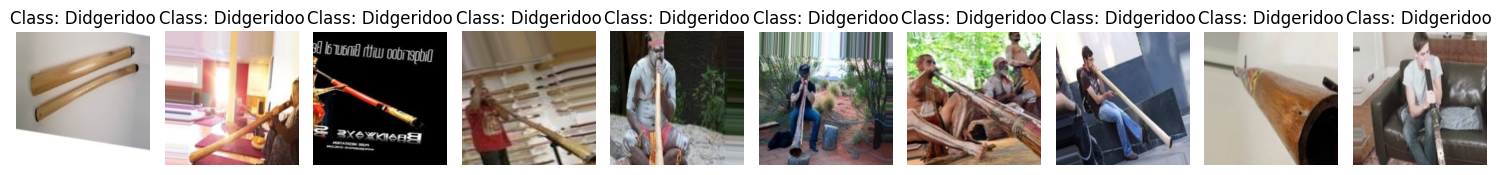

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get class indices (to find class names)
class_indices = {v: k for k, v in train_gen.class_indices.items()}

# Function to plot images from the same class
def plot_augmented_images_from_same_class(data_gen, target_class_idx, num_samples=5):
    images_plotted = 0
    plt.figure(figsize=(15, 3))
    
    while images_plotted < num_samples:
        images, labels = next(data_gen)
        
        # Get the indices of images that match the target class
        matching_indices = np.where(np.argmax(labels, axis=1) == target_class_idx)[0]
        
        for idx in matching_indices:
            plt.subplot(1, num_samples, images_plotted + 1)
            plt.imshow(images[idx])
            plt.title(f"Class: {class_indices[target_class_idx]}")
            plt.axis('off')
            images_plotted += 1
            if images_plotted == num_samples:
                break
    
    plt.tight_layout()
    plt.show()

# Example: visualize 5 augmented samples from class index 0
plot_augmented_images_from_same_class(train_gen, target_class_idx=0, num_samples=10)


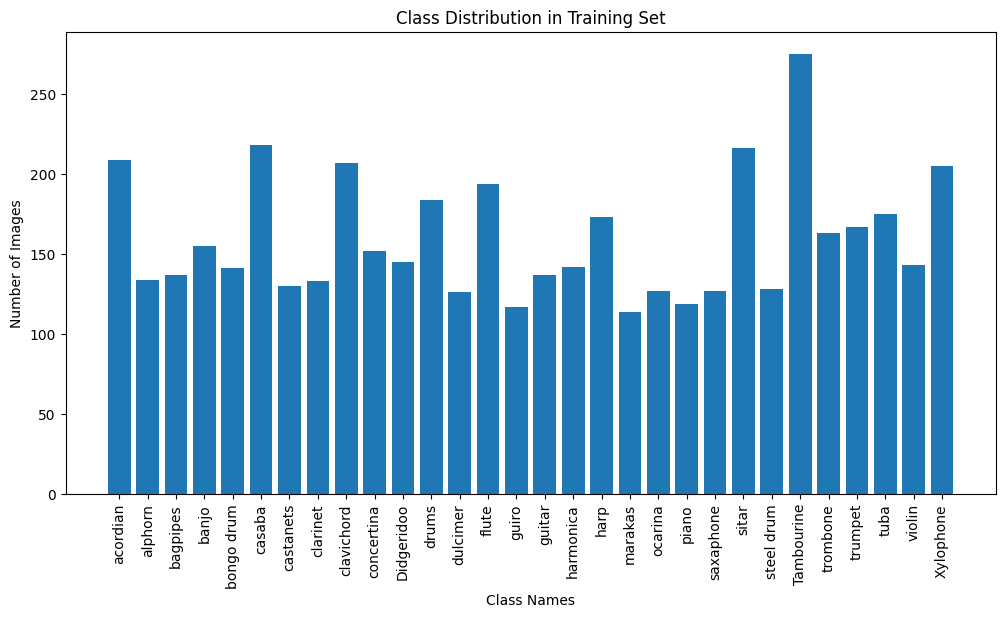

Class counts: {'acordian': 209, 'alphorn': 134, 'bagpipes': 137, 'banjo': 155, 'bongo drum': 141, 'casaba': 218, 'castanets': 130, 'clarinet': 133, 'clavichord': 207, 'concertina': 152, 'Didgeridoo': 145, 'drums': 184, 'dulcimer': 126, 'flute': 194, 'guiro': 117, 'guitar': 137, 'harmonica': 142, 'harp': 173, 'marakas': 114, 'ocarina': 127, 'piano': 119, 'saxaphone': 127, 'sitar': 216, 'steel drum': 128, 'Tambourine': 275, 'trombone': 163, 'trumpet': 167, 'tuba': 175, 'violin': 143, 'Xylophone': 205}


In [14]:
# Check class distribution in your dataset
import matplotlib.pyplot as plt
import os

# Count number of images per class in the training directory
train_class_counts = {}
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        train_class_counts[class_name] = len(os.listdir(class_dir))

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xticks(rotation=90)
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Set')
plt.show()

# Print the counts
print("Class counts:", train_class_counts)